## Maniulação de Imagens

- Aceder e alterar pixeis de imagens
- Alterar tamanho de imagens
- Cortar imagens
- Rodar imagens

In [1]:
# Importar bibliotecas necessarias

from PIL import Image
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

### Aceder e Alterar Pixeis de Imagens

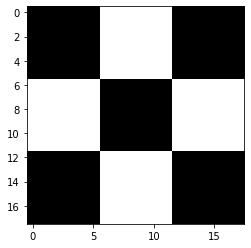

In [2]:
# Carregar imagem na escala de cinzentos
cb_image = cv.imread('./img/checkerboard_18x18.png', 0)

# Visualizar imagem
plt.imshow(cb_image, cmap="gray")

In [3]:
# Matriz da Imagem
print(cb_image)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

#### Aceder a pixeis individuais

In [4]:
# Pixel correspondente a primeira linha e primeira coluna
print("Primeira linha, primeira colina: ", cb_image[0, 0])

# Pixel correspondente a primeira linha e setima coluna
print("Primeira linha, sétima coluna", cb_image[0, 6])

# [linha, coluna]

Primeira linha, primeira colina:  0
Primeira linha, sétima coluna 255


#### Alterar valor de pixeis

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0 255 255   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0 255 255   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255 255 255   0   0 255 255]
 [  0   0 200 200   0   0 255 255 255 255 255 255 255 255   0   0 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0 255 255   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0 255 255   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

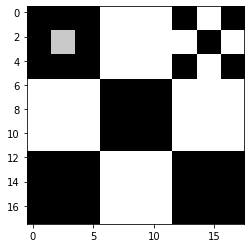

In [5]:
# Cópia da imagem
cb_copy =  cb_image.copy()

cb_copy[2, 2] = 200
cb_copy[2, 3] = 200
cb_copy[3, 2] = 200
cb_copy[3, 3] = 200

# Em alternativa mumpy slicing:
cb_copy[0:2, 14:16] = 255
cb_copy[4:6, 14:16] = 255
cb_copy[2:4, 12:14] = 255
cb_copy[2:4, 16:18] = 255

print(cb_copy)
plt.imshow(cb_copy, cmap="gray")

### Recortar Imagens

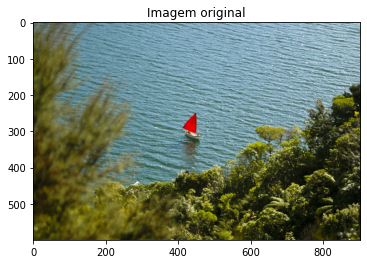

In [6]:
original_img = cv.imread('./img/New_Zealand_Boat.jpg', 1)[:,:,::-1]
plt.title("Imagem original");plt.imshow(original_img)

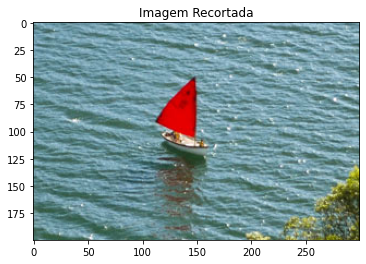

In [7]:
# Cortar imagem em torno do barco
cropped_region = original_img[200:400, 300:600]
plt.title("Imagem Recortada");plt.imshow(cropped_region)

### Alterar Tamanho

#### Aumentar tamanho 2x

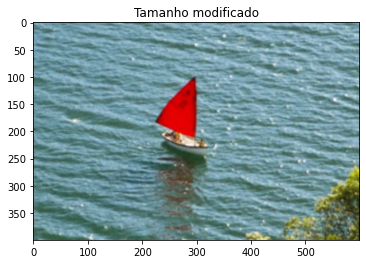

In [8]:
resize_croped = cv.resize(cropped_region, None, fx = 2, fy = 2)
plt.title("Tamanho modificado");plt.imshow(resize_croped)

#### Alterar para tamanho especificado

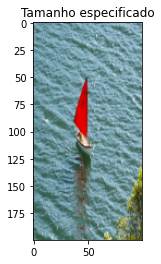

In [9]:
width = 100
height = 200

dim = (width, height)

resize_croped = cv.resize(cropped_region, dsize=dim, interpolation=cv.INTER_AREA)
plt.title("Tamanho especificado");plt.imshow(resize_croped)

#### Alterar tamanho mantendo *ratio*

In [10]:
resize_croped.shape[1]

100

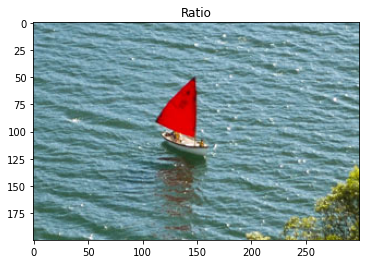

In [11]:
width = 300
aspect_ratio = width / cropped_region.shape[1] # largura de imagem
height = int(cropped_region.shape[0] * aspect_ratio) # altura da imagem
dim = (width, height)

resize_croped = cv.resize(cropped_region, dsize = dim, interpolation = cv.INTER_AREA)
plt.title("Ratio");plt.imshow(resize_croped)

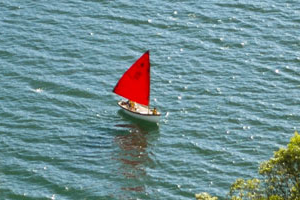

In [12]:
# Save resized image 
resize_croped = resize_croped[:,:,::-1]
cv.imwrite("./img/resized_image_boat.png", resize_croped)

# Display image
Image(filename="./img/resized_image_boat.png")

### Rodar Imagens

Text(0.5, 1.0, 'Rodar Ambas')

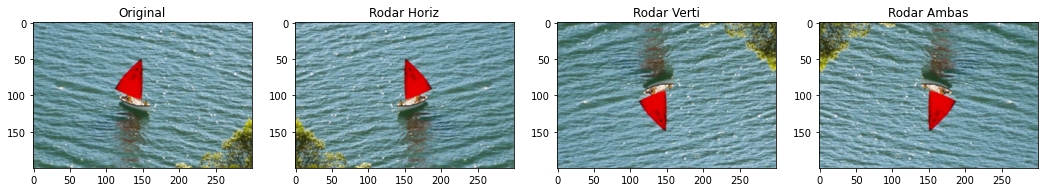

In [14]:
resize_croped = resize_croped[:,:,::-1]

resize_croped_flipped_horz = cv.flip(resize_croped, 1)
resize_croped_flipped_vert = cv.flip(resize_croped, 0)
resize_croped_flipped_both = cv.flip(resize_croped, -1)

# Mostrar Imagens
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(resize_croped);plt.title("Original")
plt.subplot(142);plt.imshow(resize_croped_flipped_horz);plt.title("Rodar Horiz")
plt.subplot(143);plt.imshow(resize_croped_flipped_vert);plt.title("Rodar Verti")
plt.subplot(144);plt.imshow(resize_croped_flipped_both);plt.title("Rodar Ambas")